# [IMDB DATASET](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [1]:
import pandas as pd

corpus = pd.read_csv("../util/IMDB Dataset.csv")
corpus.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Remove Duplicates

In [2]:
print(corpus.duplicated().sum())

corpus.drop_duplicates(inplace=True)
corpus.describe()

418


,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


## Unbiased Distribution

An unbiased dataset allows for the model to predict sentiments more accurately

sentiment
positive    24884
negative    24698
Name: count, dtype: int64


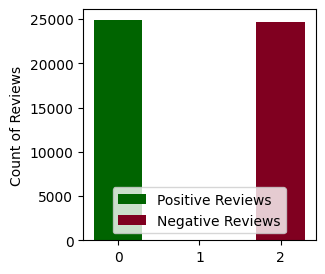

In [3]:
import matplotlib.pyplot as plt

sentiments = corpus["sentiment"].value_counts()
pos_sentiments = sentiments["positive"]
neg_sentiments = sentiments["negative"]

print(sentiments)

def plot_sentiments():
    plt.rcParams['figure.figsize']=(3,3)
    plt.rcParams['legend.loc'] = "lower center"
    plt.bar(0,pos_sentiments,width=0.6,label='Positive Reviews',color='#006400')
    plt.bar(2,neg_sentiments,width=0.6,label='Negative Reviews',color='#800020')
    plt.legend()
    plt.ylabel('Count of Reviews')
    
plot_sentiments()

## Length of Reviews

The distribution of review lengths helps determine an optimal maximum word count for embedding. We can select a cutoff point that effectively captures the majority of reviews while minimizing data loss.

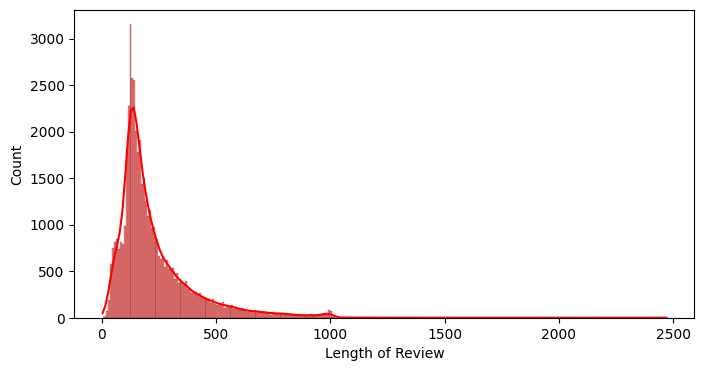

In [4]:
import seaborn as sns

reviews = corpus["review"]
lengths = []

for review in reviews:
    lengths.append(len(review.split())) 

plt.rcParams["figure.figsize"] = (8,4)
sns.histplot(lengths,color="red",kde=True)
plt.xlabel("Length of Review")
plt.show()

## Length of Reviews Without Stop words

Stop words are common words like the, are, we, etc... These words carry almost no meaning in the context of sentiment analysis so they will be removed before being embedded

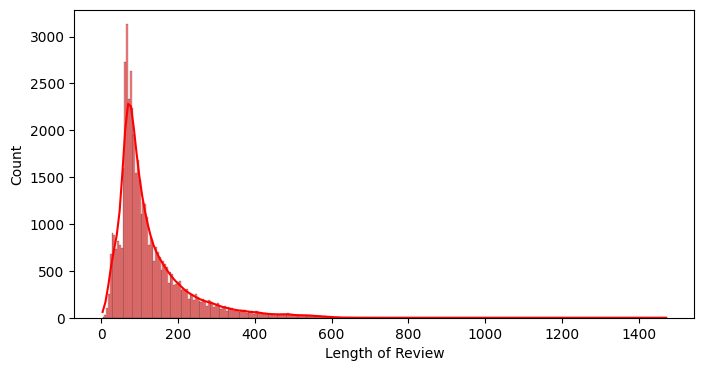

In [5]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
lengths = []

for review in reviews:
    split = review.lower().split()
    review_len = 0
    for word in split:
        if(word not in stop_words):
            review_len +=1
    lengths.append(review_len)
    
plt.rcParams["figure.figsize"] = (8,4)
sns.histplot(lengths,color="red",kde=True)
plt.xlabel("Length of Review")
plt.show()

## N-Gram Analysis

N-Gram Analysis is useful because it shows us patterns that might strongly correlate to their respective sentiment.

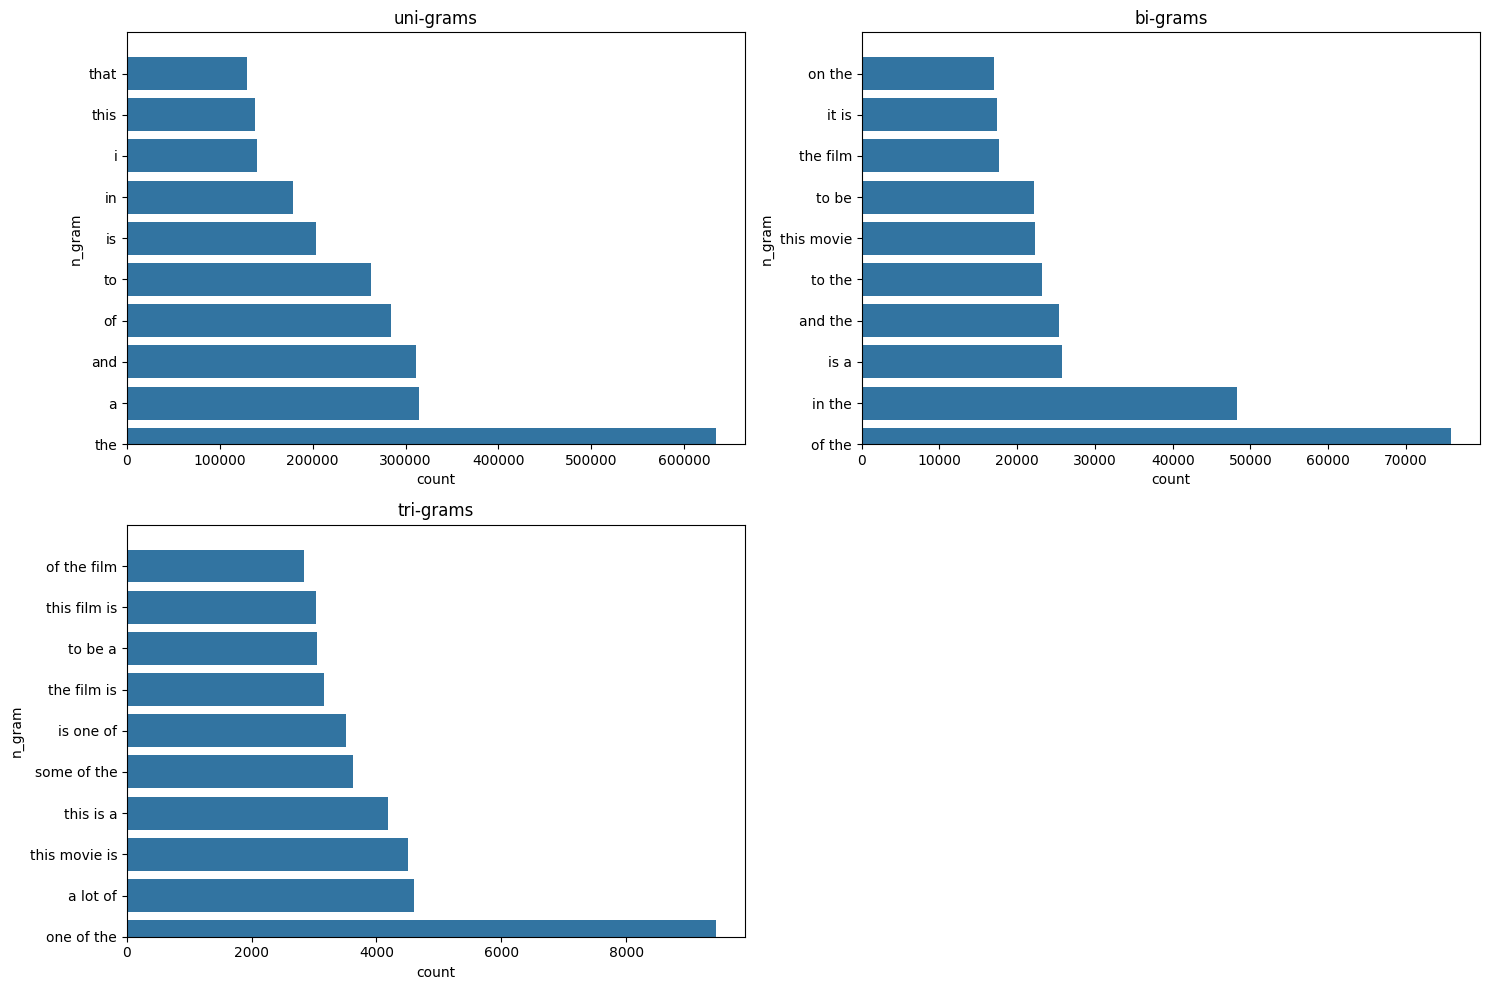

In [6]:
from collections import Counter
import seaborn as sns
import pandas as pd

def gram_analysis(reviews,gram):
    n_grams = []
    for review in reviews:
        tokens = review.lower().split()
        for i in range(len(tokens)):
            if(i+gram>len(tokens)):
                break
            else:
                words = []

                for j in range(i, i+gram):
                    words.append(tokens[j])
                    words.append(" ")
                words.pop()

            n_grams.append(''.join(words))

    return Counter(n_grams)

def plot_n_grams(n_grams, ax, n_common=10):
    most_common = n_grams.most_common(n_common)
    data_frame = pd.DataFrame(most_common, columns=["n_gram", "count"])
    sns.barplot(data=data_frame, x="count", y="n_gram", ax=ax)
    ax.set(ylim=(0, n_common))

uni_grams = gram_analysis(reviews, 1)
bi_grams = gram_analysis(reviews, 2)
tri_grams = gram_analysis(reviews, 3)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

plot_n_grams(uni_grams, ax[0, 0])
ax[0, 0].set_title("uni-grams")

plot_n_grams(bi_grams, ax[0, 1])
ax[0, 1].set_title("bi-grams")

plot_n_grams(tri_grams, ax[1, 0])
ax[1, 0].set_title("tri-grams")
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Wordcloud

Wordclouds provide a simple visual representation of the most common words found in the reviews

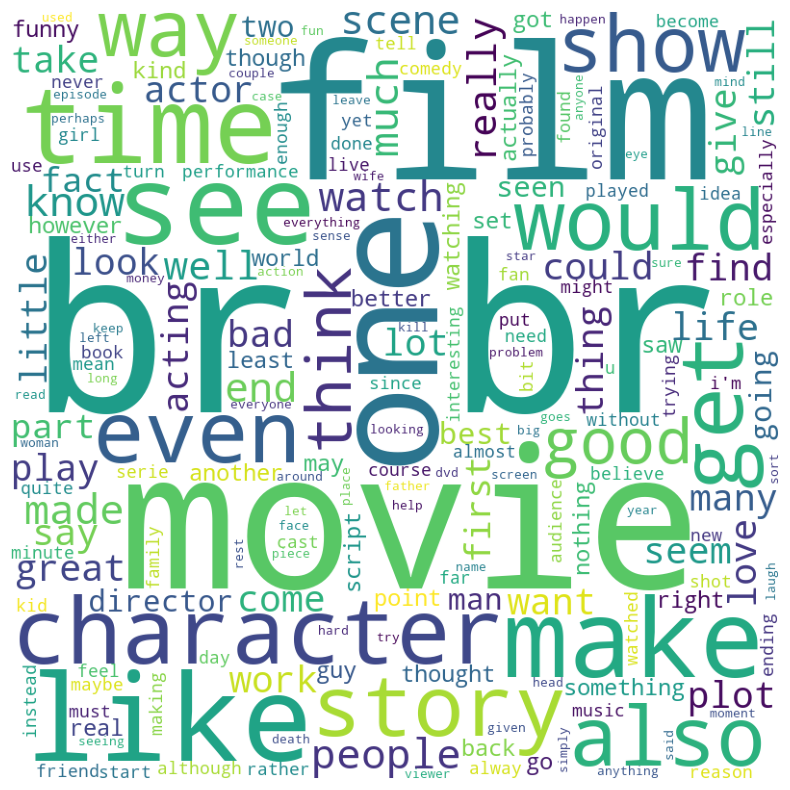

In [7]:
from wordcloud import WordCloud

words = []

for review in reviews:
    tokens = review.lower().split()
    for token in tokens:
        words.append(token)
        words.append(" ")

words = ''.join(words)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(words)
                        
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()